In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import re
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from dmba import plotDecisionTree
from sklearn import tree
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import LabelEncoder
import seaborn as sns 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

C:\Users\krhof\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Loading the CSV files into Pandas DataFrames
geometries_df = pd.read_csv('geometries.csv')
locations_df = pd.read_csv('locations.csv')
location_ratings_df = pd.read_csv('location_ratings.csv')
simulations_df = pd.read_csv('simulations.csv')

##Data Quality Assessment

Checking the number of rows and columns in the dataframes

In [3]:
#df.shape give the rows and columns in the dataframe (rows, columns)
print('Records in geometric dataframe', geometries_df.shape)
print('Records in locations dataframe', locations_df.shape)
print('Records in location ratings dataframe', location_ratings_df.shape)
print('Records in simulations dataframe', simulations_df.shape)

Records in geometric dataframe (3255905, 13)
Records in locations dataframe (3026, 503)
Records in location ratings dataframe (3025, 7)
Records in simulations dataframe (367678, 369)


Observing data stats

In [4]:
# summary statistics for Geometries df
print("\nSummary statistics for Geometries:")
geometries_df.describe()


Summary statistics for Geometries:


,site_id,building_id,plan_id,floor_id,unit_id,area_id,elevation,height
count,3.255905e+06,3.255905e+06,3.255905e+06,3.255905e+06,2.667404e+06,8.401560e+05,3.255905e+06,3.255905e+06
mean,2.588307e+03,4.398214e+03,1.316622e+04,1.744027e+04,6.719335e+04,7.819682e+05,7.336867e+00,2.216333e+00
std,3.734114e+03,5.722709e+03,1.467519e+04,1.660160e+04,4.844788e+04,4.569955e+05,6.786311e+00,6.454510e-01
min,1.700000e+01,1.000000e+00,2.000000e+00,2.000000e+00,4.967000e+03,2.736420e+05,-1.160000e+01,2.000000e-01
25%,4.690000e+02,1.121000e+03,3.383000e+03,5.200000e+03,2.813600e+04,4.097040e+05,2.900000e+00,2.000000e+00
50%,9.190000e+02,2.047000e+03,6.254000e+03,1.033900e+04,5.324800e+04,6.638685e+05,5.800000e+00,2.600000e+00
75%,2.272000e+03,3.392000e+03,1.651100e+04,2.539500e+04,1.001400e+05,1.007464e+06,1.160000e+01,2.600000e+00
max,1.192300e+04,1.865500e+04,4.439600e+04,5.172500e+04,1.616240e+05,1.680666e+06,5.774000e+01,6.000000e+00


The "geometries" dataframe contains information related to over 3.25 million geometric entities within apartments, such as separators, openings, areas, and features. Each entity is identified by various IDs including site, building, plan, floor, unit, and area IDs.

The elevation of these entities varies, with an average elevation of about 7.34 meters and a standard deviation of approximately 6.79 meters. The heights of these entities average around 2.22 meters with a standard deviation of 0.65 meters. The minimum elevation recorded is approximately -11.6 meters, while the maximum elevation reaches up to around 57.74 meters.

In [5]:
# summary statistics for locations df
print("\nSummary statistics for Locations:")
locations_df.describe()


Summary statistics for Locations:


,building_id,climate_tnorm_year,climate_tnorm_january,climate_tnorm_february,climate_tnorm_march,climate_tnorm_april,climate_tnorm_may,climate_tnorm_june,climate_tnorm_july,climate_tnorm_august,...,walkshed_shop_caravan,walkshed_shop_water,walkshed_healthcare_veterinary,walkshed_shop_swimming_pool,walkshed_historic_baptistry,walkshed_shop_houseware;electronics,walkshed_shop_pyrotechnics;party,walkshed_historic_vehicle,walkshed_amenity_lavoir,walkshed_healthcare_speech_therapist
count,3026.00000,3026.000000,3026.000000,3026.000000,3026.000000,3026.000000,3026.000000,3026.000000,3026.000000,3026.000000,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
mean,3847.76074,10.275454,1.440697,2.282662,6.196878,9.997554,14.045231,17.685305,19.589638,19.125252,...,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,NaN,1.0
std,4632.92370,0.841684,0.846031,0.949655,0.925217,0.884272,0.807378,0.847857,0.924114,0.879503,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.00000,6.708245,-1.250958,-1.023393,2.268585,5.744262,9.817786,13.435184,15.276811,15.089749,...,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,NaN,1.0
25%,1105.25000,9.772278,0.874149,1.614500,5.628697,9.514327,13.676332,17.262110,19.052968,18.601120,...,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,NaN,1.0
50%,2095.50000,10.133322,1.170637,1.957837,6.016222,9.966605,14.088820,17.732166,19.552666,19.115154,...,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,NaN,1.0
75%,5149.00000,11.094929,2.340630,3.210007,7.025591,10.737158,14.687294,18.413601,20.420715,19.930910,...,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,NaN,1.0
max,18326.00000,13.923366,4.760815,6.180428,10.399518,13.740533,17.521202,21.327499,23.376314,22.836317,...,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,NaN,1.0



The "Locations" dataset contains information related to various aspects across approximately 3,026 buildings. The dataset encompasses climate-related details, including temperature and precipitation norms across different months of the year.

For instance, the average yearly mean temperature is around 10.28 degrees Celsius, with fluctuations across the months, such as the lowest mean temperature observed in January at approximately 1.44 degrees Celsius and the highest in August at around 19.59 degrees Celsius. The dataset also includes details on different amenities and points of interest within a 10-minute walk from each building.

In [6]:
# summary statistics for location ratings df
print("\nSummary statistics for Location Ratings:")
location_ratings_df.describe()


Summary statistics for Location Ratings:


,building_id,location_rating_MIKRAT_W,location_rating_IMAGE_W,location_rating_FZ_W,location_rating_DL_W,location_rating_NASE_W_DOM,location_rating_FGFRQZ
count,3025.000000,3021.000000,3021.000000,3021.000000,3021.00000,2985.000000,3020.000000
mean,3847.914380,3.423138,2.913174,3.618471,3.40672,6.052931,1.426159
std,4633.681952,0.547926,1.155734,0.751447,1.23999,3.066928,0.952070
min,1.000000,1.900000,1.000000,1.000000,1.00000,1.000000,1.000000
25%,1105.000000,3.000000,1.200000,3.000000,2.10000,3.000000,1.000000
50%,2095.000000,3.400000,3.000000,4.000000,4.00000,7.000000,1.000000
75%,5151.000000,3.800000,4.000000,4.000000,4.10000,9.000000,1.000000
max,18326.000000,4.700000,5.000000,5.000000,5.00000,9.000000,5.000000



The "Location Ratings" dataset consists of ratings associated with different aspects across approximately 3,025 buildings. This dataset provides insights into the overall living situation, image, service quality, leisure quality, dominant segment of demand, and the average number of pedestrians per hour within the area of these buildings.

The mean values across various ratings indicate an average overall living situation score of around 3.42, an image score of approximately 2.91, service quality at 3.62, leisure quality around 3.41, with the dominant segment of demand averaging at 6.05. The mean number of pedestrians per hour is about 1.43.

The dataset demonstrates diverse scores, highlighting variations in the perceptions of living conditions and infrastructure across different buildings. The scores range from a minimum of 1.0 to a maximum of 5.0, showcasing the diversity in the quality of living experiences and amenities among these buildings.

In [7]:
# summary statistics for simulations df
print("\nSummary statistics for Simulations:")
simulations_df.describe()


Summary statistics for Simulations:


,site_id,building_id,plan_id,floor_id,unit_id,area_id,layout_compactness,layout_mean_walllengths,layout_area,layout_net_area,...,connectivity_balcony_distance_stddev,connectivity_loggia_distance_max,connectivity_loggia_distance_mean,connectivity_loggia_distance_median,connectivity_loggia_distance_min,connectivity_loggia_distance_p20,connectivity_loggia_distance_p80,connectivity_loggia_distance_stddev,layout_biggest_rectangle_length,layout_biggest_rectangle_width
count,367678.000000,367678.000000,367678.000000,367678.000000,367678.000000,3.676780e+05,367678.000000,367678.000000,367678.000000,367678.000000,...,297735.000000,35023.000000,35023.000000,35023.000000,35023.000000,35023.000000,35023.000000,35023.000000,367620.000000,367620.000000
mean,2410.181401,4143.517714,12527.934766,16740.649889,65602.293409,7.495622e+05,0.673512,1.979796,10.958213,9.822321,...,0.852714,8.321282,6.427257,6.401572,4.743397,5.611387,7.226690,0.883828,3.876098,2.307271
std,3551.150215,5453.623499,14175.985829,16080.032174,47725.516734,4.478217e+05,0.122548,1.040880,8.417667,8.477491,...,0.559700,4.733976,4.140204,4.142334,3.917446,4.015562,4.343463,0.623302,1.719055,0.990594
min,17.000000,1.000000,2.000000,2.000000,4967.000000,2.736420e+05,0.034093,0.063980,0.002475,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.104205,0.023755
25%,478.000000,1141.000000,3406.000000,5286.000000,27506.000000,3.993725e+05,0.625811,1.186880,4.614215,3.482531,...,0.466769,5.250000,2.983702,3.000000,0.500000,1.750000,4.000000,0.479303,2.598126,1.488517
50%,893.000000,2017.000000,6128.000000,10098.000000,52412.000000,5.874210e+05,0.721109,1.711110,9.572410,8.305394,...,0.903289,8.500000,6.597656,6.500000,4.750000,5.750000,7.500000,0.895077,3.839670,2.155922
75%,2247.000000,3313.000000,15592.000000,24216.000000,98160.000000,9.755138e+05,0.763198,2.544298,14.723620,14.435569,...,1.181392,11.500000,9.155642,9.250000,7.250000,8.250000,10.250000,1.190400,4.650637,3.100802
max,11910.000000,18650.000000,44390.000000,51718.000000,161612.000000,1.680478e+06,0.972696,11.463661,346.485584,146.014572,...,8.736242,51.000000,38.694620,39.000000,37.500000,37.750000,39.750000,12.837849,37.676272,10.705871



The "Simulations" dataset includes a wide array of attributes associated with approximately 367,678 instances. These attributes cover various aspects such as site IDs, building IDs, plan IDs, floor IDs, unit IDs, area IDs, and multiple layout characteristics.

For instance, the mean value for layout compactness stands at approximately 0.67, while the mean wall length averages around 1.98. Additionally, the average layout area is around 10.96, and the net area averages at 9.82. These statistics reflect the general layout and area characteristics across the dataset.

There is considerable variability in the data, with minimum values for several attributes notably lower than their respective means and maximum values. For instance, layout compactness ranges from 0.03 to 0.97, indicating a wide spectrum of design variations.

Checking Outliers

The function detect_outliers is designed to pinpoint outliers within numerical columns of a DataFrame using the Interquartile Range (IQR) method. It begins by extracting the numerical columns from the DataFrame and initializing an empty dictionary to store outlier information. For each numerical column, the function calculates the first quartile (q1), third quartile (q3), and subsequently determines the interquartile range (iqr). Using these metrics, it defines the lower and upper bounds for outlier identification. It then filters the DataFrame, identifying values that fall beyond these bounds and records these outliers in the outliers_dict. Finally, the function returns a dictionary where keys correspond to column names, each storing a DataFrame containing the identified outliers for that particular column.

In [8]:
def detect_outliers(df):
    # selecting numerical columns
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

    # initializing a dictionary to store outliers for each numerical column
    outliers_dict = {}

    # iterating through each numerical column
    for col in numerical_cols:
        # Calculating quartiles
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)

        # calculating the Interquartile Range (IQR)
        iqr = q3 - q1

        #determining the lower and upper bounds for outliers
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        #extracting outliers for the current column
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        #storing outliers in the dictionary
        outliers_dict[col] = outliers

    return outliers_dict


In [9]:
#detect outliers
outliers_geometries = detect_outliers(geometries_df)
outliers_locations = detect_outliers(locations_df)
outliers_location_ratings = detect_outliers(location_ratings_df)

In [10]:
print('Outliers in geometries: ', len(outliers_geometries))
print('Outliers in locations: ', len(locations_df))
print('Outliers in locations ratings: ', len(outliers_location_ratings))

Outliers in geometries:  8
Outliers in locations:  3026
Outliers in locations ratings:  7


In [11]:
# Check for missing values
print("Missing values in Geometries:")
print(geometries_df.isnull().sum())


Missing values in Geometries:
apartment_id       588501
site_id                 0
building_id             0
plan_id                 0
floor_id                0
unit_id            588501
area_id           2415749
unit_usage              0
entity_type             0
entity_subtype          0
geometry                0
elevation               0
height                  0
dtype: int64


In [12]:
pd.set_option('display.max_rows', None)

print("\nMissing values in Locations:")
print(locations_df.isnull().sum())



Missing values in Locations:
building_id                                                0
climate_tnorm_year                                         0
climate_tnorm_january                                      0
climate_tnorm_february                                     0
climate_tnorm_march                                        0
climate_tnorm_april                                        0
climate_tnorm_may                                          0
climate_tnorm_june                                         0
climate_tnorm_july                                         0
climate_tnorm_august                                       0
climate_tnorm_september                                    0
climate_tnorm_october                                      0
climate_tnorm_november                                     0
climate_tnorm_december                                     0
climate_tmaxnorm_year                                      0
climate_tmaxnorm_january                               

In [13]:
print("\nMissing values in Location Ratings:")
print(location_ratings_df.isnull().sum())



Missing values in Location Ratings:
building_id                    0
location_rating_MIKRAT_W       4
location_rating_IMAGE_W        4
location_rating_FZ_W           4
location_rating_DL_W           4
location_rating_NASE_W_DOM    40
location_rating_FGFRQZ         5
dtype: int64


In [14]:
print("\nMissing values in Simulations:")
print(simulations_df.isnull().sum())


Missing values in Simulations:
site_id                                            0
building_id                                        0
plan_id                                            0
floor_id                                           0
unit_id                                            0
area_id                                            0
unit_usage                                         0
apartment_id                                       0
layout_compactness                                 0
layout_is_navigable                                0
layout_mean_walllengths                            0
layout_area                                        0
layout_net_area                                    0
layout_room_count                                  0
layout_std_walllengths                             0
layout_area_type                                   0
layout_number_of_doors                             0
layout_number_of_windows                           0
layout_has_sin

In [15]:
# Identify duplicate rows
def check_duplicates(df):
  duplicate_rows = df[df.duplicated()].shape[0]
  # Display duplicate rows
  print("Duplicate Rows:", duplicate_rows)

print("Geometries df")
check_duplicates(geometries_df)

Geometries df
Duplicate Rows: 119


In [16]:
print("Locations df")
check_duplicates(locations_df)

Locations df
Duplicate Rows: 0


In [17]:
print("Locations ratings df")
check_duplicates(location_ratings_df)

Locations ratings df
Duplicate Rows: 0


In [18]:
print("Simulations df")
check_duplicates(simulations_df)

Simulations df
Duplicate Rows: 0


##Data Cleaning and Transformation

Removing duplicates from Geometries df

In [19]:
# Remove duplicate rows
geometries_df.drop_duplicates(inplace=True)

Handling null values


In managing null values across various DataFrames, a multi-step approach was employed. Initially, a threshold of 50% missing values within columns was set, aiming to drop columns surpassing this limit. This was executed using the null_threshold function, which calculated the threshold based on half the DataFrame's length and subsequently dropped columns where missing values exceeded this threshold.

For specific columns in the 'geometries_df' DataFrame ('apartment_id' and 'unit_id'), the missing values were addressed by filling them with the values from the preceding rows, achieved through the fillna method with the parameter method='ffill'. This ensured continuity in these columns, utilizing the last known values to fill the missing ones.

In the subsequent DataFrames ('locations_df', 'location_ratings_df', and 'simulations_df'), missing values were handled differently. The fillna method with the 'median' strategy was employed, aiming to replace NaN values in each column with the respective column's median value. This approach centered the missing value imputation around the median to maintain consistency and minimize the impact of outliers that could skew the data.

In [20]:
# threshold for dropping columns with more than 30% missing values
def null_threshold(df):
  threshold = 0.5 * len(df)
  # Dropping columns with more than threshold missing values
  df = df.dropna(thresh=threshold, axis=1, inplace=True)

In [21]:
#running the threshold function on the dataframes
null_threshold(geometries_df)
null_threshold(locations_df)
null_threshold(location_ratings_df)
null_threshold(simulations_df)

In [22]:
#filling missing values in 'apartment_id' and 'unit_id' columns with the values from the row above
geometries_df['apartment_id'].fillna(method='ffill', inplace=True)
geometries_df['unit_id'].fillna(method='ffill', inplace=True)

C:\Users\krhof\AppData\Local\Temp\ipykernel_22272\441548657.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  geometries_df['apartment_id'].fillna(method='ffill', inplace=True)
C:\Users\krhof\AppData\Local\Temp\ipykernel_22272\441548657.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  geometries_df['unit_id'].fillna(method='ffill', inplace=True)


In [23]:
# Filling missing values in the dataframes with the median of each column
locations_df = locations_df.fillna(locations_df.median())
location_ratings_df = location_ratings_df.fillna(location_ratings_df.median())
simulations_df = simulations_df.fillna(simulations_df.median())

TypeError: Cannot convert [['RESIDENTIAL' 'RESIDENTIAL' 'RESIDENTIAL' ... 'RESIDENTIAL'
  'RESIDENTIAL' 'RESIDENTIAL']
 ['3c3b1d6ca8b4b9092480b8c75f9eaa81' '3c3b1d6ca8b4b9092480b8c75f9eaa81'
  '3c3b1d6ca8b4b9092480b8c75f9eaa81' ...
  'b0027ca76f79c5363ef036f4332fe78c' 'b0027ca76f79c5363ef036f4332fe78c'
  'b0027ca76f79c5363ef036f4332fe78c']
 ['Room' 'Kitchen' 'Bathroom' ... 'Corridor' 'Kitchen' 'Room']] to numeric

##Data Integration


The data merging process involved integrating multiple DataFrames based on shared columns. Initially, the merging began with 'locations_df' and 'location_ratings_df' DataFrames, utilizing the 'building_id' column as the common identifier. The pd.merge function was employed here, specifying an 'inner' join type to combine these two DataFrames based on their 'building_id' columns. This ensured that only the rows with matching 'building_id' values in both DataFrames were included in the resulting merged DataFrame ('merged_loc_ratings').

Subsequently, the merging continued by integrating 'geometries_df' with the previously merged 'locations' and 'location_ratings' DataFrames. This merging process used the 'building_id' column as the common key to merge 'geometries_df' with 'merged_loc_ratings'. Similarly, an 'inner' join type was used in the pd.merge function, allowing for the combination of these datasets based on the 'building_id' column.

In [26]:
#merging geometries and merged_loc_ratings dataframe
merged_loc_geo = pd.merge(geometries_df, merged_loc_ratings, on=['building_id'], how='inner')


##Exploratory Data Analysis

In [25]:
#merging locations and location ratings on shared column building_id
merged_loc_ratings = pd.merge(locations_df, location_ratings_df, on='building_id', how='inner')


In [27]:
# Set the style
import seaborn as sns
sns.set_style("whitegrid")

#set the context to 'notebook' for better readability
sns.set_context("notebook", font_scale=1.2)

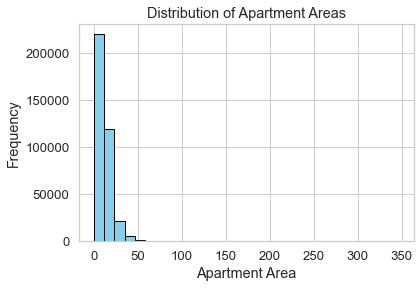

In [28]:
import matplotlib.pyplot as plt

#plotting a histogram of 'layout_area' from simulations_df
plt.hist(simulations_df['layout_area'], bins=30, color='skyblue', edgecolor='black')

#labeling the x-axis
plt.xlabel('Apartment Area')

#labeling the y-axis
plt.ylabel('Frequency')

#Title for the histogram
plt.title('Distribution of Apartment Areas')

#Displaying the plot
plt.show()


The histogram represents the distribution of 'layout_area' values across 367,678 data points. The majority of the observations fall within a range between approximately 4.61 and 14.72, as indicated by the interquartile range (25th to 75th percentile). The 'layout_area' values vary widely, ranging from a minimum of 0.0025 to a maximum of 346.49. The mean 'layout_area' is approximately 10.96, signifying the average area across the dataset. The distribution appears right-skewed, with a concentration of values towards the lower end of the range, as the mean is slightly higher than the median (50th percentile), which stands at 9.57. Additionally, the dataset contains some outliers, as the maximum value is notably distant from the bulk of the data represented by the interquartile range.

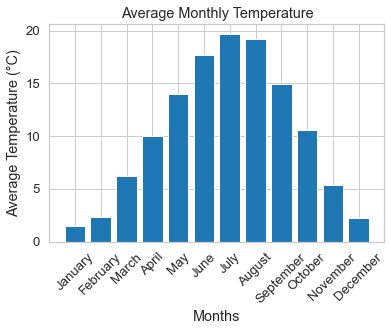

In [29]:
# extracting columns related to climate temperature from merged_loc_geo
climate_columns = [col for col in merged_loc_geo.columns if col.startswith('climate_tnorm')]

# calculating the average temperature across the climate-related columns
average_temp = merged_loc_geo[climate_columns].mean()

# extracting month names from the column names for labeling
months = [col.split('_')[-1].capitalize() for col in climate_columns]

# plotting a bar chart for average monthly temperature
plt.bar(months[1:], average_temp[1:])  #Excluding the first column (yearly average)
plt.xlabel('Months')  #Label for x-axis
plt.ylabel('Average Temperature (°C)')  #Label for y-axis
plt.title('Average Monthly Temperature')  #Title of the plot
plt.xticks(rotation=45)  #Rotating x-axis labels for better readability
plt.show()  #Display the plot


This bar chart represents the distribution of temperature normals across different months of the year. Each bar corresponds to a specific month, showing the average temperature norm measured over a given period. Warmer months, like July and August, tend to have higher average temperature norms, with values around 19.64 and 19.17, respectively. Conversely, cooler months, such as December and January, exhibit lower average temperature norms, hovering around 2.22 and 1.46, respectively. The chart illustrates the seasonal variation in temperatures, peaking during the summer months and dropping during winter.

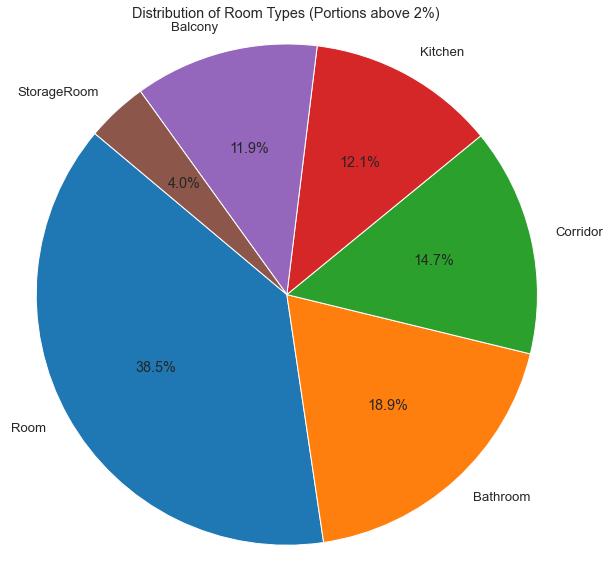

In [30]:
#creating a square figure with a size of 10x10 inches
plt.figure(figsize=(10, 10))

#calculating the value counts for 'layout_area_type' column
room_types = simulations_df['layout_area_type'].value_counts()

#filtering room types with portions above or equal to 2%
room_types_filtered = room_types[room_types / room_types.sum() >= 0.02]

#creating a pie chart for filtered room types
plt.pie(room_types_filtered, labels=room_types_filtered.index, autopct='%1.1f%%', startangle=140)

#setting the aspect ratio to be equal to ensure a circular pie chart
plt.axis('equal')

#adding a title to the pie chart
plt.title('Distribution of Room Types (Portions above 2%)')

#displaying the pie chart
plt.show()


This pie chart displays the distribution of various room types having more than 2% records in the dataset. The "Room" category constitutes the largest portion, accounting for approximately 46.6% of the total, followed by "Bathroom" at roughly 22.9%. "Corridor" and "Kitchen" make up about 17.9% and 14.8%, respectively. Smaller segments include "Balcony" (14.7%), "StorageRoom" (4.9%), "Loggia" (1.5%), "SunRoom" (0.1%), and "LivingKitchen" (negligible at less than 0.1%).

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

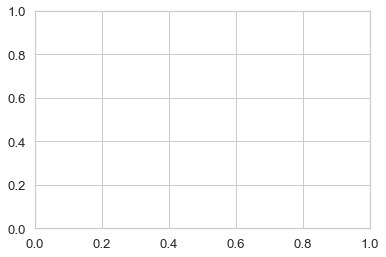

In [32]:
#selecting columns related to sunshine from the merged dataset
sunshine_columns = [col for col in merged_loc_geo.columns if col.startswith('climate_snorm')]

# calculating the mean of sunshine duration across months
mean_sunshine = merged_loc_geo[sunshine_columns].mean()

# extracting month names from column names for plotting
months = [col.split('_')[-1].capitalize() for col in sunshine_columns]

# creating a line plot to display the mean sunshine duration over months
plt.plot(months[1:], mean_sunshine[1:], marker='o', linestyle='-', color='orange')

#Labeling the x-axis and y-axis
plt.xlabel('Months')
plt.ylabel('Mean Sunshine Duration (%)')

# setting the title for the plot
plt.title('Mean Sunshine Duration Over Months')

# rotating x-axis labels for better readability
plt.xticks(rotation=45)

# adding gridlines to the plot
plt.grid(True)

# displaying the plot
plt.show()


This line chart illustrates the variation in normalized climate values across different months throughout the year. The y-axis likely represents the normalized climate values, while the x-axis depicts the months of the year.

There's a clear seasonal pattern visible, with peaks observed in the summer months—July and August—which exhibit the highest normalized climate values around 54.7% and 55.3%, respectively. Conversely, the winter months, such as December and January, indicate lower values, with December showing the lowest normalized climate value at approximately 23.6%.

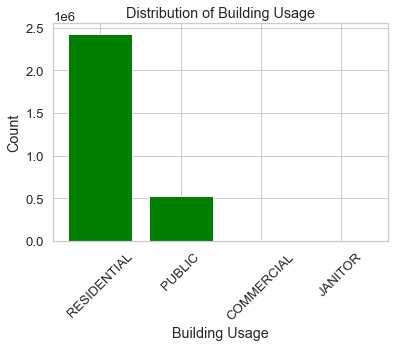

In [33]:
#getting the count of different building usages from the merged dataset
building_usage = merged_loc_geo['unit_usage'].value_counts()

#creating a bar plot to display the distribution of building usage
plt.bar(building_usage.index, building_usage.values, color='green')

#labeling the x-axis and y-axis
plt.xlabel('Building Usage')
plt.ylabel('Count')

#setting the title for the plot
plt.title('Distribution of Building Usage')

#rotating x-axis labels for better readability
plt.xticks(rotation=45)

#displaying the plot
plt.show()


In [34]:
building_usage.index, building_usage.values

(Index(['RESIDENTIAL', 'PUBLIC', 'COMMERCIAL', 'JANITOR'], dtype='object', name='unit_usage'),
 array([2429851,  520428,    5041,      38], dtype=int64))

the bar chart illustrates the count or frequency of various categories: 'RESIDENTIAL', 'PUBLIC', 'COMMERCIAL', and 'JANITOR'. 'RESIDENTIAL' has the highest count, approximately 2.5*10^6; followed by 'PUBLIC' with around 500,000 occurrences. 'COMMERCIAL' appears less frequently, with approximately 5,000 counts, while 'JANITOR' has the fewest occurrences, approximately 50.

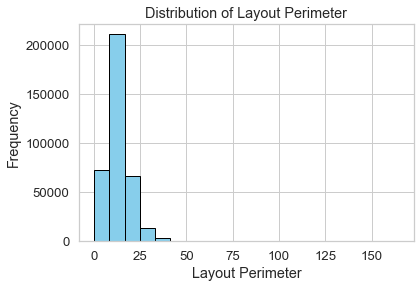

In [35]:
#creating a histogram to display the distribution of layout perimeters
plt.hist(simulations_df['layout_perimeter'], bins=20, color='skyblue', edgecolor='black')

#labeling the x-axis and y-axis
plt.xlabel('Layout Perimeter')
plt.ylabel('Frequency')

#setting the title for the plot
plt.title('Distribution of Layout Perimeter')

#displaying the plot
plt.show()


The histogram displays the distribution of Layout Perimeter. The data is centered around a mean of approximately 14, with a relatively symmetrical shape indicative of a normal or Gaussian distribution. Most of the values tend to cluster between approximately 9.27 and 16.34, as indicated by the 25th and 75th percentiles, suggesting a concentration around this range

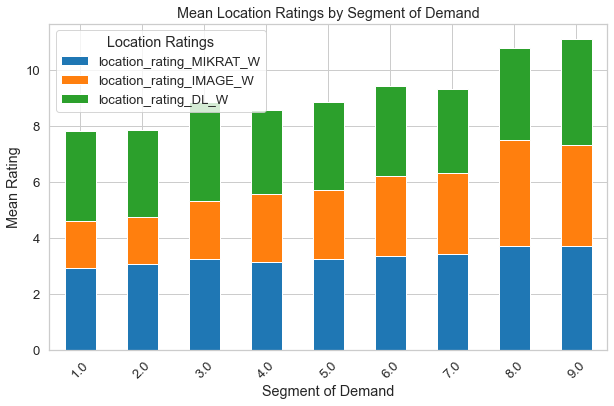

In [36]:
#welecting specific location rating columns from the merged data
location_ratings = merged_loc_geo[['location_rating_NASE_W_DOM', 'location_rating_MIKRAT_W', 'location_rating_IMAGE_W', 'location_rating_DL_W']]

#grouping the location ratings based on 'location_rating_NASE_W_DOM' and calculating the mean for each group
location_ratings_grouped = location_ratings.groupby('location_rating_NASE_W_DOM').mean()

#creating a stacked bar chart to display mean location ratings for different segments of demand
location_ratings_grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

#labeling x-axis and y-axis
plt.xlabel('Segment of Demand')
plt.ylabel('Mean Rating')

#title for the plot
plt.title('Mean Location Ratings by Segment of Demand')

#adding a legend with title for the location ratings
plt.legend(title='Location Ratings')

#rotating x-axis labels for better readability
plt.xticks(rotation=45)

#displaying the plot
plt.show()


The stacked bar chart visualizes the distribution of different rating aspects across varying rating levels (1.0 to 9.0) in relation to Segment Demand on the dataset. Each bar represents a distinct rating level, segmented into sections representing different aspects such as 'location_rating_MIKRAT_W', 'location_rating_IMAGE_W', and 'location_rating_DL_W'. At rating level 1.0, MIKRAT has the highest contribution to the overall rating, followed by DL and IMAGE. As the rating level increases, there's a noticeable shift in the aspect contributions; while MIKRAT remains relatively consistent, IMAGE gradually gains more weight, especially from rating levels 4.0 to 6.0. At higher ratings like 8.0 and 9.0, IMAGE holds a significantly larger portion of the overall rating, surpassing the influence of other aspects like MIKRAT and DL. This trend suggests a change in the significance of aspects as the ratings elevate, with IMAGE becoming more impactful in higher-rated instances.

In [37]:
geom_loc_ratings = pd.merge(geometries_df, location_ratings_df, on='building_id')
print(geom_loc_ratings.head())
print(geom_loc_ratings.columns)
print(geom_loc_ratings.dtypes) 
print(geom_loc_ratings['geometry'].head())

                       apartment_id  site_id  building_id  plan_id  floor_id  \
0  3c3b1d6ca8b4b9092480b8c75f9eaa81      210          399     1054      1588   
1  3c3b1d6ca8b4b9092480b8c75f9eaa81      210          399     1054      1588   
2  3c3b1d6ca8b4b9092480b8c75f9eaa81      210          399     1054      1588   
3  3c3b1d6ca8b4b9092480b8c75f9eaa81      210          399     1054      1588   
4  3c3b1d6ca8b4b9092480b8c75f9eaa81      210          399     1054      1588   

   unit_id   unit_usage entity_type entity_subtype  \
0   7300.0  RESIDENTIAL        area       BATHROOM   
1   7300.0  RESIDENTIAL        area    LIVING_ROOM   
2   7300.0  RESIDENTIAL        area           ROOM   
3   7300.0  RESIDENTIAL        area        KITCHEN   
4   7300.0  RESIDENTIAL        area           ROOM   

                                            geometry  elevation  height  \
0  POLYGON ((-2.7337844078265210 4.07980744083215...        0.0     2.6   
1  POLYGON ((5.8278988701887320 7.8168767234

In [38]:
geom_loc_ratings = geom_loc_ratings.astype({'unit_usage':'category'})
geom_loc_ratings = geom_loc_ratings.astype({'entity_type':'category'})
geom_loc_ratings = geom_loc_ratings.astype({'entity_subtype':'category'})
geom_loc_ratings = geom_loc_ratings.astype({'apartment_id':'category'})
geom_loc_ratings = geom_loc_ratings.astype({'geometry':'category'})
print(geom_loc_ratings.dtypes)
print(geom_loc_ratings.columns)

apartment_id                  category
site_id                          int64
building_id                      int64
plan_id                          int64
floor_id                         int64
unit_id                        float64
unit_usage                    category
entity_type                   category
entity_subtype                category
geometry                      category
elevation                      float64
height                         float64
location_rating_MIKRAT_W       float64
location_rating_IMAGE_W        float64
location_rating_FZ_W           float64
location_rating_DL_W           float64
location_rating_NASE_W_DOM     float64
location_rating_FGFRQZ         float64
dtype: object
Index(['apartment_id', 'site_id', 'building_id', 'plan_id', 'floor_id',
       'unit_id', 'unit_usage', 'entity_type', 'entity_subtype', 'geometry',
       'elevation', 'height', 'location_rating_MIKRAT_W',
       'location_rating_IMAGE_W', 'location_rating_FZ_W',
       'location_ra

In [39]:
# Predict overall rating (location_rating_MIKRAT_W) using the geometries and ratings datasets 
# 'location_rating_MIKRAT_W'
# 'apartment_id', 'site_id', 'building_id', 'plan_id', 'floor_id', 'unit_id', 'unit_usage', 'entity_type', 'entity_subtype', 'geometry', 'elevation', 'height', 'location_rating_IMAGE_W', 'location_rating_FZ_W', 'location_rating_DL_W', 'location_rating_NASE_W_DOM', 'location_rating_FGFRQZ'

In [40]:
geom_loc_ratings = geom_loc_ratings.drop(columns = 'apartment_id')
geom_loc_ratings = geom_loc_ratings.drop(columns = 'geometry')

In [41]:
dummy_unitusage = pd.get_dummies(geom_loc_ratings['unit_usage'], dtype=int)
geom_loc_ratings = pd.concat([geom_loc_ratings, dummy_unitusage], axis=1)

dummy_entitytype = pd.get_dummies(geom_loc_ratings['entity_type'], dtype=int)
geom_loc_ratings = pd.concat([geom_loc_ratings, dummy_entitytype], axis=1)


dummy_unitsubtype = pd.get_dummies(geom_loc_ratings['entity_subtype'], dtype=int)
geom_loc_ratings = pd.concat([geom_loc_ratings, dummy_unitsubtype], axis=1)

print(geom_loc_ratings.head())

   site_id  building_id  plan_id  floor_id  unit_id   unit_usage entity_type  \
0      210          399     1054      1588   7300.0  RESIDENTIAL        area   
1      210          399     1054      1588   7300.0  RESIDENTIAL        area   
2      210          399     1054      1588   7300.0  RESIDENTIAL        area   
3      210          399     1054      1588   7300.0  RESIDENTIAL        area   
4      210          399     1054      1588   7300.0  RESIDENTIAL        area   

  entity_subtype  elevation  height  ...  VOID  WAITING_ROOM  WALL  WAREHOUSE  \
0       BATHROOM        0.0     2.6  ...     0             0     0          0   
1    LIVING_ROOM        0.0     2.6  ...     0             0     0          0   
2           ROOM        0.0     2.6  ...     0             0     0          0   
3        KITCHEN        0.0     2.6  ...     0             0     0          0   
4           ROOM        0.0     2.6  ...     0             0     0          0   

   WASHING_MACHINE  WASH_AND_DRY

In [42]:
geom_loc_ratings = geom_loc_ratings.drop(columns = 'unit_usage')
geom_loc_ratings = geom_loc_ratings.drop(columns = 'entity_type')
geom_loc_ratings = geom_loc_ratings.drop(columns = 'entity_subtype')

In [43]:
X = geom_loc_ratings.drop(columns = 'location_rating_MIKRAT_W')
y = geom_loc_ratings[['location_rating_MIKRAT_W']]

scaler = StandardScaler()
scaler.fit(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

print(X_train.shape, y_train.shape)

(2068750, 106) (2068750, 1)


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
# fit MLR model
geomloc_mlr = LinearRegression()
geomloc_mlr.fit(X_train, y_train)

print("Intercept:", geomloc_mlr.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'Coefficient': geomloc_mlr.coef_.reshape(-1)}))

# predict out values
y_predicted = geomloc_mlr.predict(X_test)

print(y_predicted[:5])


Intercept: [1.53220454]
                      Predictor   Coefficient
0                       site_id  3.275890e-05
1                   building_id -2.320064e-05
2                       plan_id -4.098308e-06
3                      floor_id  7.141226e-06
4                       unit_id -9.363725e-07
5                     elevation  1.083832e-03
6                        height -2.660197e-03
7       location_rating_IMAGE_W  3.097256e-01
8          location_rating_FZ_W  9.047653e-02
9          location_rating_DL_W  1.274927e-01
10   location_rating_NASE_W_DOM  4.528424e-03
11       location_rating_FGFRQZ -8.281816e-03
12                   COMMERCIAL  5.897219e-02
13                      JANITOR -4.571565e-01
14                       PUBLIC  2.076721e-01
15                  RESIDENTIAL  1.905122e-01
16                         area -1.331677e-02
17                      feature -1.741550e-02
18                      opening  2.072027e-02
19                    separator  1.001200e-02
20        

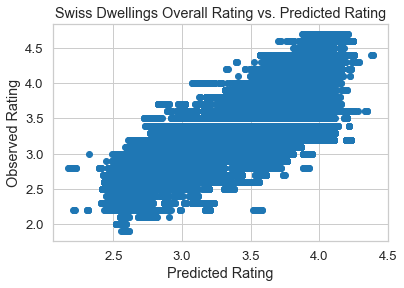

In [46]:
# Plot
plt.scatter(y_predicted, y_test)
plt.title("Swiss Dwellings Overall Rating vs. Predicted Rating")
plt.xlabel("Predicted Rating")
plt.ylabel("Observed Rating")

plt.show()

In [53]:
# Forward and backward selection with Merged Locations and Location Ratings datasets
from sklearn.feature_selection import SequentialFeatureSelector

In [54]:
x = merged_loc_ratings.drop(columns = 'location_rating_MIKRAT_W')
y = merged_loc_ratings[['location_rating_MIKRAT_W']]

scaler = StandardScaler()
scaler.fit(x)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)

print(x_train.shape, y_train.shape)

(2117, 111) (2117, 1)


In [55]:
sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select=5, direction='forward')
sfs.fit(x_train, y_train)
x_selected_F = sfs.transform(x_train)
print(x_selected_F)

[[11.84439945  7.32807875  4.          4.          5.        ]
 [ 8.23518562  6.47885084  3.9         4.9         3.        ]
 [10.34242725  8.87071705  3.          4.          4.        ]
 ...
 [10.79804134  6.81282997  3.          3.9         1.        ]
 [ 9.81045914  6.39076233  4.          3.          2.        ]
 [10.69112682  6.8614521   3.          4.          2.        ]]


In [56]:
sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select=5, direction='backward')
sfs.fit(x_train, y_train)
x_selected_B = sfs.transform(x_train)
print(x_selected_B)

[[ 6.81197119 15.54425335  4.          4.          5.        ]
 [ 4.66560936 12.6368866   3.9         4.9         3.        ]
 [ 6.78952408 14.46130943  3.          4.          4.        ]
 ...
 [ 5.90368938 14.22464848  3.          3.9         1.        ]
 [ 5.21570301 13.49811649  4.          3.          2.        ]
 [ 5.93717575 14.22776794  3.          4.          2.        ]]


In [57]:
model_merged_loc_ratings = LinearRegression()
model_merged_loc_ratings.fit(x_selected_F, y_train)
print(model_merged_loc_ratings.score(x_selected_F, y_train))

0.7084940364196286


In [58]:
model_merged_loc_ratings = LinearRegression()
model_merged_loc_ratings.fit(x_selected_B, y_train)
print(model_merged_loc_ratings.score(x_selected_B, y_train))

0.7026926936073701


In [59]:
# Decision Tree and Random Forest used for selection

In [60]:
# Decision Tree

In [61]:
DTR = DecisionTreeRegressor().fit(x_train, y_train)
DTRtrainpred = DTR.predict(x_train)
DTRtestpred = DTR.predict(x_test)

In [62]:
y_enc = preprocessing.LabelEncoder()
ytrain_enc = y_enc.fit_transform(y_train)
print(ytrain_enc)

[17 21 22 ... 14 16  7]


C:\Users\krhof\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
y_enc = preprocessing.LabelEncoder()
ytest_enc = y_enc.fit_transform(y_test)
print(ytest_enc)

[ 6 14 12 19 14 17 10  5 19 16  5 14 20  8 12 17 16 15  9 10 20  9 11  6
 11 13 14  9 14 18 12 11 13 10 18 21  8  8 21  4 18  3 26 13 15 15 17 16
 21  8 18 15  4 14 14 10  4 14 15 12 14  9 13 10 11  9 14  3  9 13 15 15
 10 15 20 13 11 15  7 16 13  4  4 12  6 11 16 11 20 11  5 21 13 20 16 17
  8 12 12 15  3 23 21 22 17 15 15 16 15  8 13 17  7 11 17 23 22 17 16  7
 14 18 20  5 15 14  5 15 15  6 21 13 11  8 16 18  5 11 14  9  7 17 10 10
 22  2 18 14  5 22 13  8 11 14 15  6  8 11 12  5  4 16 19 18 20 18  9  2
  7  9 13  6 20 22 12 12 17  7 14 14 21 14 15  1  3 15 16 22 12  2 16 21
 11  4  7 17 11  5  3 18  6 16 18 11 17 25  4 15  9 14 10 13 22 18  9  5
 22  3  6 17  7 10 18 11 21 15  4  7 11 14 10  7 14 19 11 12 14 11 17  9
 21 13 17  8  6 10 13 14 16 14 16  7 14 21  1 14 21 16 14 19  9  9 21 15
 18 21 21 20 12  5 12  7 20 21 16 18 11 11  9 11 18  7  5  9  5  5 19  3
 12 17 19 17  6 14  8 11 16  8 10 11 14 21 17 17 17  1 11  6 23  8 17  9
 10 13  8  1 11 13 13 22 13 19  7 11 20  9 10 14 19

In [64]:
DTRtrainmse = metrics.mean_squared_error(y_train, DTRtrainpred)
DTRtestmse = metrics.mean_squared_error(y_test, DTRtestpred) 
print("DTR train vs test MSE:", DTRtrainmse, DTRtestmse)

DTR train vs test MSE: 5.412472672808312e-32 0.10023127753303963


In [65]:
DTRtrainr2 = metrics.r2_score(y_train, DTRtrainpred)
DTRtestr2 = metrics.r2_score(y_test, DTRtestpred)
print("DTR train vs test R^2:",DTRtrainr2, DTRtestr2)

DTR train vs test R^2: 1.0 0.6602963542188438


In [66]:
locations_tree = DecisionTreeClassifier()
locations_tree.fit(x_train, ytrain_enc)

DecisionTreeClassifier()

In [67]:
from sklearn import tree
tree = tree.export_text(locations_tree)
print(tree)

|--- feature_106 <= 2.70
|   |--- feature_106 <= 2.45
|   |   |--- feature_108 <= 4.05
|   |   |   |--- feature_87 <= 9.50
|   |   |   |   |--- feature_86 <= 15.50
|   |   |   |   |   |--- feature_83 <= 5.50
|   |   |   |   |   |   |--- feature_0 <= 17423.00
|   |   |   |   |   |   |   |--- feature_42 <= 31.13
|   |   |   |   |   |   |   |   |--- feature_0 <= 619.50
|   |   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |   |--- feature_0 >  619.50
|   |   |   |   |   |   |   |   |   |--- feature_108 <= 1.45
|   |   |   |   |   |   |   |   |   |   |--- feature_106 <= 1.15
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_106 >  1.15
|   |   |   |   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |   |   |   |--- feature_108 >  1.45
|   |   |   |   |   |   |   |   |   |   |--- feature_24 <= 14.09
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of dep

[Text(0.419495454990273, 0.9814814814814815, 'X[106] <= 2.7\ngini = 0.949\nsamples = 2117\nvalue = [1, 2, 2, 19, 16, 21, 46, 69, 98, 102, 83, 106\n82, 124, 123, 171, 156, 169, 100, 107, 104, 97, 81\n105, 40, 45, 20, 22, 6]'),
 Text(0.18187272704264398, 0.9444444444444444, 'X[106] <= 2.45\ngini = 0.909\nsamples = 557\nvalue = [1, 2, 2, 17, 14, 20, 45, 58, 80, 81, 56, 58\n23, 26, 23, 23, 18, 2, 3, 1, 0, 4, 0, 0, 0\n0, 0, 0, 0]'),
 Text(0.18087593546553282, 0.9074074074074074, 'X[108] <= 4.05\ngini = 0.909\nsamples = 549\nvalue = [1, 2, 2, 17, 14, 20, 45, 58, 80, 81, 56, 50\n23, 26, 23, 23, 18, 2, 3, 1, 0, 4, 0, 0, 0\n0, 0, 0, 0]'),
 Text(0.1390001031835031, 0.8703703703703703, 'X[87] <= 9.5\ngini = 0.894\nsamples = 444\nvalue = [1, 2, 2, 17, 14, 20, 44, 50, 78, 69, 42, 45\n14, 19, 10, 13, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0]'),
 Text(0.1181241823194094, 0.8333333333333334, 'X[86] <= 15.5\ngini = 0.9\nsamples = 267\nvalue = [1, 2, 2, 15, 13, 10, 32, 35, 47, 19, 23, 31, 9\n13, 5, 8, 2, 0

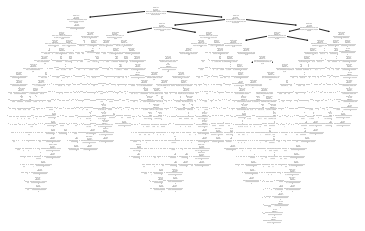

In [68]:
from sklearn import tree
tree.plot_tree(locations_tree)

In [69]:
scores=[]
for i in range(1,101):
    tree = DecisionTreeClassifier(random_state = 1, max_depth = i)
    tree.fit(x_train, ytrain_enc)
    scores.append(tree.score(x_test, ytest_enc))
    
print(scores) 

[0.07709251101321586, 0.07819383259911894, 0.07268722466960352, 0.07378854625550661, 0.08480176211453745, 0.08149779735682819, 0.07599118942731277, 0.08259911894273128, 0.07048458149779736, 0.07709251101321586, 0.07158590308370044, 0.06387665198237885, 0.07378854625550661, 0.06167400881057269, 0.06828193832599119, 0.07488986784140969, 0.06277533039647577, 0.06607929515418502, 0.07158590308370044, 0.06387665198237885, 0.06938325991189427, 0.06938325991189427, 0.06938325991189427, 0.06828193832599119, 0.07048458149779736, 0.07048458149779736, 0.0671806167400881, 0.0671806167400881, 0.0671806167400881, 0.0671806167400881, 0.0671806167400881, 0.0671806167400881, 0.0671806167400881, 0.0671806167400881, 0.0671806167400881, 0.0671806167400881, 0.0671806167400881, 0.0671806167400881, 0.0671806167400881, 0.0671806167400881, 0.0671806167400881, 0.0671806167400881, 0.0671806167400881, 0.0671806167400881, 0.0671806167400881, 0.0671806167400881, 0.0671806167400881, 0.0671806167400881, 0.06718061674

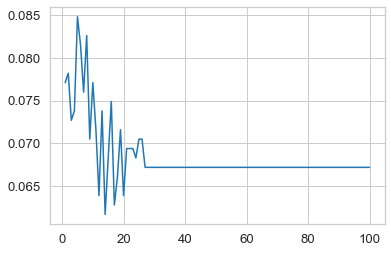

In [70]:
%matplotlib inline
plt.plot(range(1,101), scores)
plt.show()

In [71]:
locations_tree.fit(x_train, ytrain_enc)
print(locations_tree.score(x_train, ytrain_enc))

1.0


In [72]:
importances=locations_tree.feature_importances_

for i in range(len(importances)):
    print(x_train.columns[i], ": ", importances[i])

building_id :  0.07854329158224324
climate_tnorm_year :  0.0027883224437673165
climate_tnorm_january :  0.004238484911669013
climate_tnorm_february :  0.0026595846302239785
climate_tnorm_march :  0.0004978318330182202
climate_tnorm_april :  0.0012943627658473721
climate_tnorm_may :  0.007067900839464144
climate_tnorm_june :  0.0016428450489601265
climate_tnorm_july :  0.0032880607256965304
climate_tnorm_august :  0.0023564040096195754
climate_tnorm_september :  0.0004978318330182202
climate_tnorm_october :  0.0019913273320728807
climate_tnorm_november :  0.00392086321589023
climate_tnorm_december :  0.003738148784726277
climate_tmaxnorm_year :  0.0043219444131652055
climate_tmaxnorm_january :  0.0
climate_tmaxnorm_february :  0.0012445795825455502
climate_tmaxnorm_march :  0.0008534259994598061
climate_tmaxnorm_april :  0.0032658527241166873
climate_tmaxnorm_may :  0.0004978318330182202
climate_tmaxnorm_june :  0.006758568698298739
climate_tmaxnorm_july :  0.004222731825843561
climate_

In [73]:
importances = locations_tree.feature_importances_

# Sort importances and column names in descending order
indices = np.argsort(importances)[::-1]
features = x_train.columns[indices]
importances = importances[indices]

# Print features and importances in descending order
for i in range(len(importances)):
    print(features[i], ": ", importances[i])

building_id :  0.07854329158224324
location_rating_IMAGE_W :  0.05159604415656164
walkshed_amenity_parking :  0.04476176777746776
location_rating_DL_W :  0.0384498671758473
location_rating_NASE_W_DOM :  0.03142115010305385
walkshed_amenity_bench :  0.03043513591104117
walkshed_leisure_pitch :  0.02951959537670312
walkshed_tourism_information :  0.027406340336078618
walkshed_amenity_waste_basket :  0.025908923962537116
location_rating_FZ_W :  0.024695506124640255
walkshed_leisure_playground :  0.019269046538308063
walkshed_leisure_swimming_pool :  0.01846000723700119
walkshed_amenity_bicycle_parking :  0.017814803957865038
walkshed_amenity_post_box :  0.015628921734933805
walkshed_amenity_school :  0.015522150171695226
walkshed_amenity_parking_entrance :  0.015433893538371164
walkshed_amenity_recycling :  0.01533218531240022
walkshed_amenity_shelter :  0.014345849144132559
walkshed_amenity_vending_machine :  0.014281954793990236
walkshed_amenity_drinking_water :  0.013983458545621916
wa

In [74]:
x1 = merged_loc_ratings[['building_id']]
x2 = merged_loc_ratings[['location_rating_IMAGE_W']] # Living situation - image
x3 = merged_loc_ratings[['walkshed_amenity_parking']]
x4 = merged_loc_ratings[['location_rating_DL_W']] # Living situation - Service Quality
y = merged_loc_ratings[['location_rating_MIKRAT_W']]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


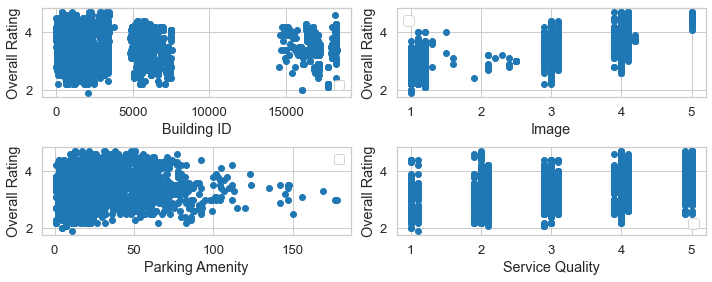

In [75]:
# Create separate plots with shared y-axis to compare top 4 predictors

fig, axes = plt.subplots(2, 2, figsize=(10, 4))

ax1 = axes[0, 0]  # Access first subplot (top-left)
ax2 = axes[0, 1]  # Access second subplot (top-right)
ax3 = axes[1, 0]  # Access third subplot (bottom-left)
ax4 = axes[1, 1]  # Access fourth subplot (bottom-right)

ax1.scatter(x1, y)
ax1.set_xlabel('Building ID')
ax1.set_ylabel('Overall Rating')
ax1.legend()

ax2.scatter(x2, y)
ax2.set_xlabel('Image')
ax2.set_ylabel('Overall Rating')
ax2.legend()

ax3.scatter(x3, y)
ax3.set_xlabel('Parking Amenity')
ax3.set_ylabel('Overall Rating')
ax3.legend()

ax4.scatter(x4, y)
ax4.set_xlabel('Service Quality')
ax4.set_ylabel('Overall Rating')
ax4.legend()

plt.tight_layout() 
plt.show()

In [76]:
# We can see definite correlation that needs further analysis and possble transformations. 

In [77]:
# Random Forest

In [78]:
RF = RandomForestRegressor(n_estimators = 10, random_state = 1)
RFR = RF.fit(x_train, ytrain_enc)
RFRtrainpred = RFR.predict(x_train)
RFRtestpred = RFR.predict(x_test)

In [79]:
RFRtrainmse = metrics.mean_squared_error(ytrain_enc, RFRtrainpred)
RFRtestmse = metrics.mean_squared_error(ytest_enc, RFRtestpred) 
RFRtrainr2 = metrics.r2_score(ytrain_enc, RFRtrainpred)
RFRtestr2 = metrics.r2_score(ytest_enc, RFRtestpred)

In [80]:
print("RFR train vs test MSE:", RFRtrainmse, RFRtestmse)

RFR train vs test MSE: 1.0579026924893717 10.49002202643172


In [81]:
print("RFR train vs test R^2:",RFRtrainr2, RFRtestr2)

RFR train vs test R^2: 0.9649004633944338 0.6444723828319121


In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import sklearn.utils.validation as val

In [83]:
forest_merged_loc_ratings = RandomForestClassifier(random_state = 1, n_estimators=101)

In [84]:
forest_merged_loc_ratings.fit(x_train, ytrain_enc)
print(forest_merged_loc_ratings.score(x_train, ytrain_enc))

1.0


In [85]:
importances=forest_merged_loc_ratings.feature_importances_

for i in range(len(importances)):
    print(x_train.columns[i], ": ", importances[i])

building_id :  0.04800422905422049
climate_tnorm_year :  0.004237214451912705
climate_tnorm_january :  0.004622909509508511
climate_tnorm_february :  0.004017729184568179
climate_tnorm_march :  0.0042275739887772884
climate_tnorm_april :  0.0039220157665130415
climate_tnorm_may :  0.003795792915748996
climate_tnorm_june :  0.004504716602363982
climate_tnorm_july :  0.004671688507812475
climate_tnorm_august :  0.003787149725579697
climate_tnorm_september :  0.004645283670158079
climate_tnorm_october :  0.004281248605771329
climate_tnorm_november :  0.0039766241765148685
climate_tnorm_december :  0.004832433603932383
climate_tmaxnorm_year :  0.004259940818754026
climate_tmaxnorm_january :  0.004620015008147022
climate_tmaxnorm_february :  0.0045966605813321255
climate_tmaxnorm_march :  0.0046487659598086995
climate_tmaxnorm_april :  0.004908597867207945
climate_tmaxnorm_may :  0.004507321757423359
climate_tmaxnorm_june :  0.004587615873554955
climate_tmaxnorm_july :  0.004993551684996894

In [86]:
importances = forest_merged_loc_ratings.feature_importances_

# Sort importances and column names in descending order
indices = np.argsort(importances)[::-1]
features = x_train.columns[indices]
importances = importances[indices]

# Print features and importances in descending order
for i in range(len(importances)):
    print(features[i], ": ", importances[i])

building_id :  0.04800422905422049
location_rating_IMAGE_W :  0.036473432361994705
walkshed_amenity_parking :  0.028309304729179998
walkshed_amenity_bench :  0.027837917443208387
walkshed_leisure_pitch :  0.024525778304123023
location_rating_DL_W :  0.023474638671692277
location_rating_NASE_W_DOM :  0.022117988155192874
walkshed_amenity_restaurant :  0.02162295181444049
walkshed_amenity_bicycle_parking :  0.019285410074233865
walkshed_amenity_vending_machine :  0.018209661277681526
walkshed_tourism_information :  0.01811933818168008
walkshed_leisure_playground :  0.01710156416727603
walkshed_amenity_waste_basket :  0.016941950183958655
walkshed_amenity_post_box :  0.016206019739173266
location_rating_FZ_W :  0.015792426361280955
walkshed_amenity_drinking_water :  0.01567992023111212
walkshed_amenity_parking_entrance :  0.014320440928035152
walkshed_amenity_school :  0.013193118109410757
walkshed_amenity_shelter :  0.012940918229717885
walkshed_leisure_park :  0.012783806425096179
walks

In [87]:
x1 = merged_loc_ratings[['building_id']]
x2 = merged_loc_ratings[['location_rating_IMAGE_W']] # Living Situation - Image
x3 = merged_loc_ratings[['walkshed_amenity_parking']]
x4 = merged_loc_ratings[['walkshed_amenity_bench']]
y = merged_loc_ratings[['location_rating_MIKRAT_W']]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


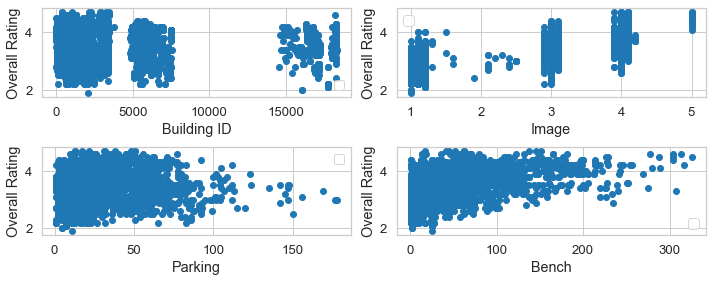

In [88]:
# Create separate plots with shared y-axis to compare top 4 predictors

fig, axes = plt.subplots(2, 2, figsize=(10, 4))

ax1 = axes[0, 0]  # Access first subplot (top-left)
ax2 = axes[0, 1]  # Access second subplot (top-right)
ax3 = axes[1, 0]  # Access third subplot (bottom-left)
ax4 = axes[1, 1]  # Access fourth subplot (bottom-right)

ax1.scatter(x1, y)
ax1.set_xlabel('Building ID')
ax1.set_ylabel('Overall Rating')
ax1.legend()

ax2.scatter(x2, y)
ax2.set_xlabel('Image')
ax2.set_ylabel('Overall Rating')
ax2.legend()

ax3.scatter(x3, y)
ax3.set_xlabel('Parking')
ax3.set_ylabel('Overall Rating')
ax3.legend()

ax4.scatter(x4, y)
ax4.set_xlabel('Bench')
ax4.set_ylabel('Overall Rating')
ax4.legend()

plt.tight_layout() 
plt.show()

In [89]:
# Same variables but this time has Amenity-Bench as the 4th predictor. 

In [90]:
# K - Nearest Neighbours

In [91]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import classification_report, confusion_matrix

In [92]:
KNN = KNeighborsClassifier()
KNN.fit(x_train, ytrain_enc)

KNeighborsClassifier()

In [93]:
knntrainpred = KNN.predict(x_train)
print("Training Accuracy of a KNN model:",metrics.accuracy_score(ytrain_enc, knntrainpred))

Training Accuracy of a KNN model: 0.4444969296173831


In [94]:
KNNtrainpred = KNN.predict(x_train)
KNNtestpred = KNN.predict(x_test)

In [95]:
KNNtrainmse = metrics.mean_squared_error(ytrain_enc, KNNtrainpred)
KNNtestmse = metrics.mean_squared_error(ytest_enc, KNNtestpred) 
KNNtrainr2 = metrics.r2_score(ytrain_enc, KNNtrainpred)
KNNtestr2 = metrics.r2_score(ytest_enc, KNNtestpred)

In [96]:
print("KNN train vs test MSE:", KNNtrainmse, KNNtestmse)

KNN train vs test MSE: 24.2579121398205 28.898678414096917


In [97]:
print("KNN train vs test R^2:",KNNtrainr2, KNNtestr2)

KNN train vs test R^2: 0.19516087710988317 0.020566567926871726


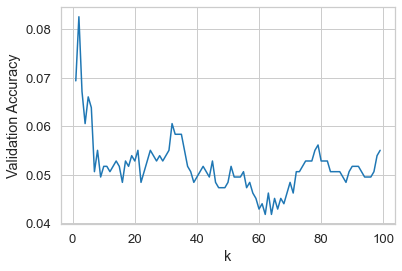

In [98]:
k_list=range(1, 100, 1)
accuracies=[]

for k in k_list: 
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train, ytrain_enc)
    accuracies.append(classifier.score(x_test, ytest_enc))

    
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")

plt.show()

In [99]:
# KNN proved to be a poor choice for prediction due to the low R squared. Decision tree using the full model was the best model for this data and Random Forest was a close second.  
# To note, a 1 R squared does cast concern of overfitting and further anaysis is needed. 